In [230]:
%pip install matplotlib
%pip install numpy
%pip install pydot
%pip install graphviz
%pip install torch

%matplotlib inline

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Goal : 
* Understand Gradient Descent
* Understand chain rule and Visualize calculation of gradient for complex functions
* Implement pytorch compatible api to calculate gradients and compare with pytorch output
* Model Neural network : Neuron, Layers and Neural net and implement way to adjust weights and biases (Second Session)
* Train the above neural net using simple inputs using forward pass, backword propagation using loss function (Second Session)

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [232]:
def f(x):
    return 3*x**2-4*x+5

In [233]:
f(3)

20

Lets Plot this function. Its mostly a parabolic function. x = -5 to 5 with steps of 0.25

In [234]:
xs = np.arange(-5.0,5.0,0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [235]:
ys=f(xs)
ys

array([100.    ,  91.6875,  83.75  ,  76.1875,  69.    ,  62.1875,
        55.75  ,  49.6875,  44.    ,  38.6875,  33.75  ,  29.1875,
        25.    ,  21.1875,  17.75  ,  14.6875,  12.    ,   9.6875,
         7.75  ,   6.1875,   5.    ,   4.1875,   3.75  ,   3.6875,
         4.    ,   4.6875,   5.75  ,   7.1875,   9.    ,  11.1875,
        13.75  ,  16.6875,  20.    ,  23.6875,  27.75  ,  32.1875,
        37.    ,  42.1875,  47.75  ,  53.6875])

Text(0.5, 0, 'x')

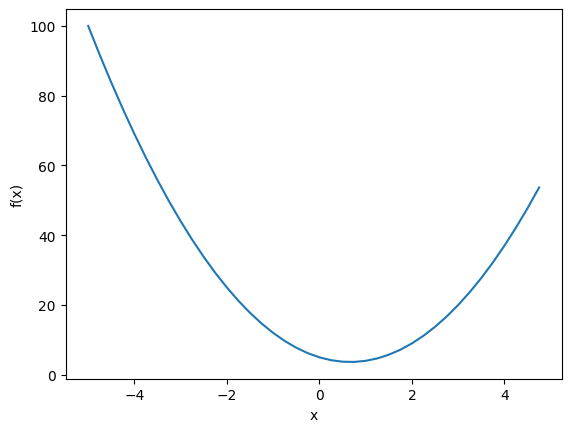

In [236]:
plt.plot(xs,ys)
plt.ylabel("f(x)")
plt.xlabel("x")

**Our Goal is to find at what input the function value is close to 0**

***Approach   : Using Gradient***

What is the derivate of this function at every input point x.
$$
f'(x) = \lim_{{h \to 0}} \frac{{f(x + h) - f(x)}}{h} 
$$


where you slighly bump-up x (input) by very small amount(h->0), how does the function response. or whats the rate of change. (slope of response.) whether it goes up or down

In [237]:
def grad(x,h=0.001):
    return (f(x+h)-f(x))/h

In [238]:
grad(-3.0), grad(0.25), grad(3.0)

(-21.996999999998934, -2.4969999999999715, 14.00300000000243)

***If we have to go towards zero. go in reverse direction of gradient***
<br>
***Higher the gradient, more aggresaive we can be in terms of increasing the next value of input***


In [239]:
x=10
epochs = 20
lr=0.05

for epoch in range(epochs):
    print(f"With x= {x}, f(x) =  {f(x)}, gradient={grad(x)}")
    x+=lr*(-grad(x))
    


With x= 10, f(x) =  265, gradient=56.0029999999756
With x= 7.19985000000122, f(x) =  131.7141200675478, gradient=39.20210000001134
With x= 5.239745000000653, f(x) =  66.40580299509291, gradient=27.441470000013624
With x= 3.8676714999999717, f(x) =  34.405962495736205, gradient=19.20902900000243
With x= 2.90722004999985, f(x) =  18.726905057363993, gradient=13.446320299998149
With x= 2.2349040349999427, f(x) =  11.044771996977303, gradient=9.41242420999977
With x= 1.7642828244999542, f(x) =  7.280950356476792, gradient=6.588696946998596
With x= 1.4348479771500244, f(x) =  5.436974243994454, gradient=4.612087862899017
With x= 1.2042435840050736, f(x) =  4.53363349283186, gradient=3.2284615040305553
With x= 1.0428205088035458, f(x) =  4.091141805529675, gradient=2.2599230528213
With x= 0.9298243561624808, f(x) =  3.874422575288993, gradient=1.5819461369748211
With x= 0.8507270493137398, f(x) =  3.768301340047228, gradient=1.1073622958819307
With x= 0.7953589345196432, f(x) =  3.7163517660

In [240]:
def plot(red_xs,red_ys):
    xs=np.arange(-5.0,5.0,0.25)
    ys=f(xs)
    plt.plot(xs,ys)
    plt.plot(red_xs, red_ys, 'ro') 
    plt.ylabel("f(x)")
    plt.xlabel("x")

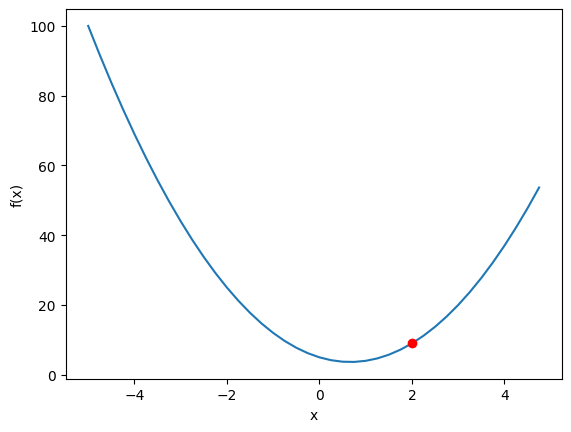

In [241]:
plot(2.0,f(2.0))

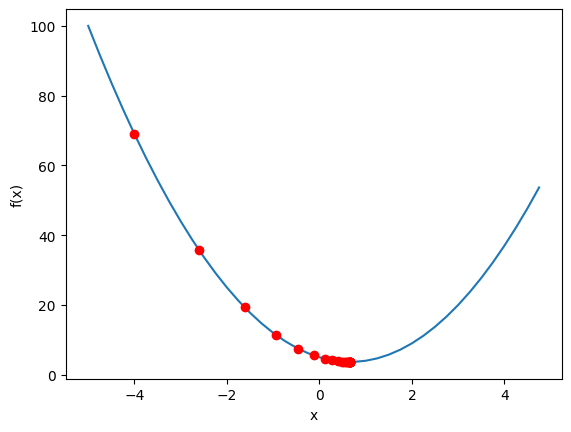

In [242]:
x=-4
epochs = 23
r_xs=[]
r_ys=[]
lr=0.05
for epoch in range(epochs):
    r_xs.append(x)
    r_ys.append(f(x))
    x+=lr*(-grad(x))
    
plot(r_xs,r_ys)


***Goal 2 : Gradient Descent for complicated function***

In [243]:
def f(a,b,c):
    return a*b+c

In [244]:
f(2.0,-3.0,10.0)

4.0

Lets calculate the derivate of function f wrt a,b and c.
we can keep b,c constant and change a



In [245]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0
# a*b+c

x1=f(a,b,c)
x2=f(a+h,b,c)
derivative = (x2-x1)/h

print(f"before step: {x1}")
print(f"after step: {x2}")
print(f"gradient is {derivative}")

before step: 4.0
after step: 3.999699999999999
gradient is -3.000000000010772


so if we increase a, the value of function goes down. hence slope (or derivate) is negative. since b is multiply (its value is 3), intuitiavvely we can tell that derivative will be be -3

In [246]:
# lets find out the gradient of function f wrt to b
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0
# a*b+c

x1=f(a,b,c)
x2=f(a,b+h,c)
derivative = (x2-x1)/h

print(f"before step: {x1}")
print(f"after step: {x2}")
print(f"gradient is {derivative}")

before step: 4.0
after step: 4.0002
gradient is 2.0000000000042206


In [247]:
# lets find out the gradient of function f wrt to c
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0
# a*b+c

x1=f(a,b,c)
x2=f(a,b,c+h)
derivative = (x2-x1)/h

print(f"before step: {x1}")
print(f"after step: {x2}")
print(f"derivate is {derivative}")

before step: 4.0
after step: 4.0001
derivate is 0.9999999999976694


Summary : For complex equation with multiple variables
* the gradient of function wrt variable which is involved in multiplication, the gradient is always the other multiplier
* the gradient of function wrt variable which is additive, the gradient is always linear

***Goal 3 : Visualize the above function using Value object***

Some building blocks. lets create a Value Object and the above expression can be supported by the value object. Also we can create a expression DAG using value object

In [248]:
class Value:
    def __init__(self,data,_children=(),_op='', label='') -> None:
        self.data=data
        self._prev=set(_children)
        self._op = _op
        self.label = label
        self.grad=0.0

    def __repr__(self) -> str:
        return f"Value(data={self.data})"
    
    def __add__(self,other):
        return Value(self.data+other.data,(self,other),_op='+')
    
    def __mul__(self,other):
        return Value(self.data*other.data,(self,other),_op='*')
    





In [249]:
a = Value(2.0)
c = Value(2.0)*Value(-3.0)+Value(10)
print(c)
print(Value(2.0).__mul__(Value(-3.0)).__add__(Value(10)))
print(c._op)
print(c._prev)

Value(data=4.0)
Value(data=4.0)
+
{Value(data=10), Value(data=-6.0)}


Lets visualize this graph using graphviz.

In [250]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

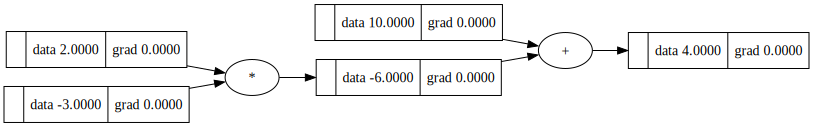

In [251]:
draw_dot(c)

In [252]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L (Loss)'


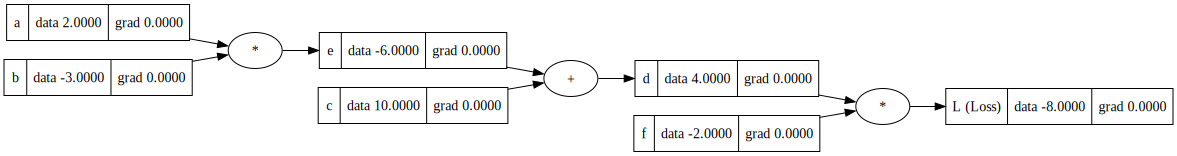

In [253]:
draw_dot(L)

Summary of what we have done : 
Able to build mathamatical equation using scalar value along the way. And we can do this **Forward Pass** and build out a mathamatical equation that produces a single value L. 
The above is visualizing the forward pass. and currenly the output of the forward pass is -8.      


*** Goal 4 is to do **back propagation** and calculate gradient along every single value***

****Chain Rule****

If a car travels twice as fast as a bicycle and the bicycle is four times as fast as a walking man, 
<br>
then the car travels 2 × 4 = 8 times as fast as the man

$$
\frac{{dz}}{dx} = \frac{{dz}}{dy} * \frac{{dy}}{dx}  = 2 * 4

$$

Instantaneous rate of change of z relative to x

In [254]:
# Lets calculate gradient of L wrt all variables
# gradient of L wrt
# L+h-L/h = 1
L.grad=1.0 

# Lets go backward and calculate gradient of L wrt other varibles
# for multiplication it is other multiplier
d.grad=-2.0
f.grad=4.0





In [255]:
# L doesnt have a direct dependency on a and b
# to calculate gradient of L wrt a and b, we can apply chain rules
# so it will be local gradient * gradient of direct dependency

# Local gradient for multiplication is always the other multiplier.

 
c.grad= 1* d.grad
e.grad=1*d.grad

In [256]:
# L doesnt have a direct dependency on e and c
# to calculate gradient of L wrt e and c, we can apply chain rules
# so it will be local gradient * gradient of direct dependency
# (e+c+h) - (e+c) / h = 1
# Local gradient for addition is always 1.

 
a.grad = b.data * e.grad
b.grad= a.data * e.grad

Lets automate this in the Value class

In [257]:
class Value:
    def __init__(self, data, _children=(), _op='', label='') -> None:
        self.data=data
        self._prev=set(_children)
        self._op = _op
        self.label = label
        self.grad=0.0
        self._backward = lambda:None

    def __repr__(self) -> str:
        return f"Value(data={self.data}, grad={self.grad})"
    
    def __add__(self,other):
        other = other if isinstance(other, Value) else Value(other)

        out = Value(self.data+other.data,(self,other),_op='+')
        def _backward():
            self.grad += out.grad * 1.0
            other.grad += out.grad * 1.0
        out._backward = _backward    
        return out
    
    def __mul__(self,other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data*other.data,(self,other),_op='*')
        
        def _backward():
            self.grad += out.grad * other.data
            other.grad += out.grad * self.data
        
        out._backward = _backward        
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += (other * self.data ** (other-1)) * out.grad
        out._backward = _backward

        return out

    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
        
        def _backward():
            self.grad += (1-t**2) * out.grad
    
        out._backward = _backward        
        return out

    def backward(self):
        self._backward()
        for node in self._prev:
            node.backward()

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
    
        def _backward():
            self.grad += out.data * out.grad 
        out._backward = _backward
    
        return out        

    def __rmul__(self, other): # other * self
        return self * other
       
    def __radd__(self, other): # other + self
        return self + other

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rsub__(self, other): # other - self
        return other + (-self)    

    def __neg__(self): # -self
        return self * -1


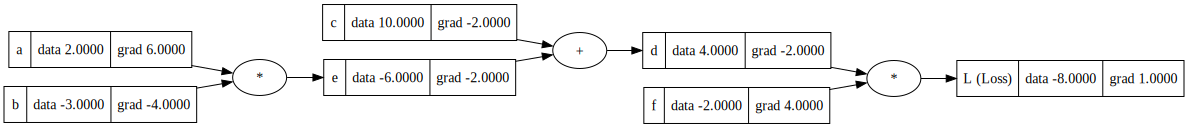

In [258]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L (Loss)'
L.grad=1.0
L.backward()
draw_dot(L)


***Goal 5 : Model the Perceptron (Neuron) manually and do backward propagation***

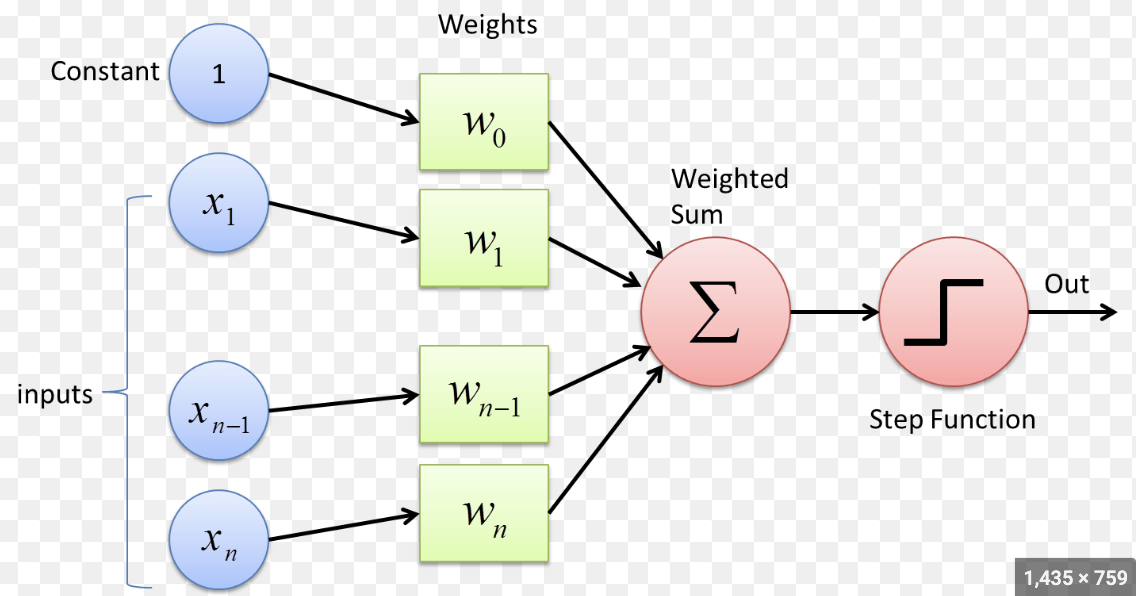

In [259]:
from IPython.display import Image
Image(filename='assets/perpceptron.png',width=500,height=300) 

Lets visualize the activation function .The activation function is come kind os squashing function to squash the value. We will use tanh here

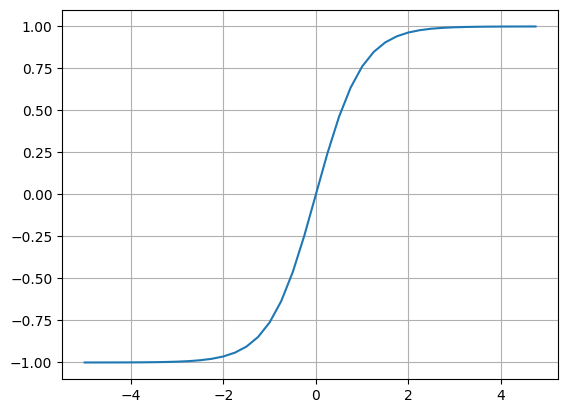

In [260]:
plt.plot(np.arange(-5,5,0.25),np.tanh(np.arange(-5,5,0.25)));
plt.grid()

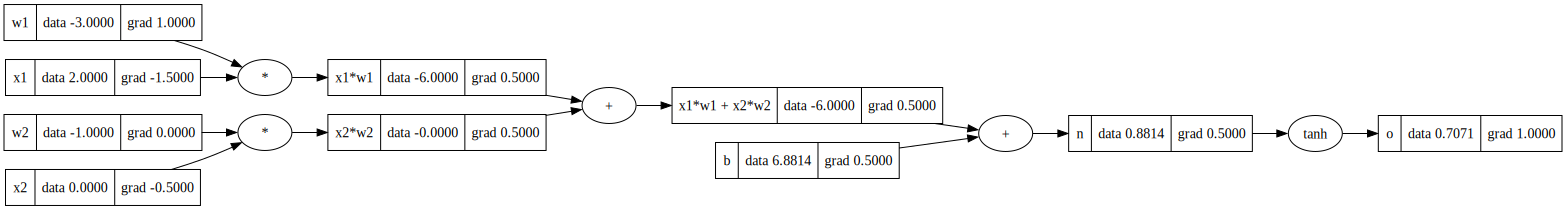

In [264]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(-1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.grad=1.0
o.backward()
draw_dot(o)

***Goal 6 : Optional : How does pytorch does the backward propagation

Lets implement this in pytorch for comparision

In [262]:
import torch

x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)

print(o.data.item())
o.backward()

print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())


0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


***Goal 6 : Lets model the neuron and check the backward propagation***

In [265]:
import random

class Neuron:
    def __init__(self,nin):
        # initialise the weights for  each input between -1 to 1
        self.w = [ Value(random.uniform(-1,1)) for _ in range(nin) ]
        # initialise the bias
        self.b = Value(random.uniform(-1,1))
    # in Python, the __call__ function is a special method that you can define in a class to make an instance of that class callable, just like a function. 
    def __call__(self,x):
        # activation function
        act = sum(xi*wi for wi, xi in zip(self.w,x)) + self.b
        # pass through non linearity
        out=act.tanh()
        return out

    def parameters(self):
        return self.w + [self.b]    




In [266]:
n = Neuron(2)
# forward pass
out = n([2.0,0.0])


out.grad=1.0
out.backward()
print(n.parameters())
out

# backward pass


[Value(data=0.47139146585104585, grad=0.43886397564687574), Value(data=-0.046389764890589325, grad=0.0), Value(data=0.44870401558775974, grad=0.21943198782343787)]


Value(data=0.8834976016812734, grad=1.0)

***Goal 6 : Lets model the Neural Network and check the backward propagation***

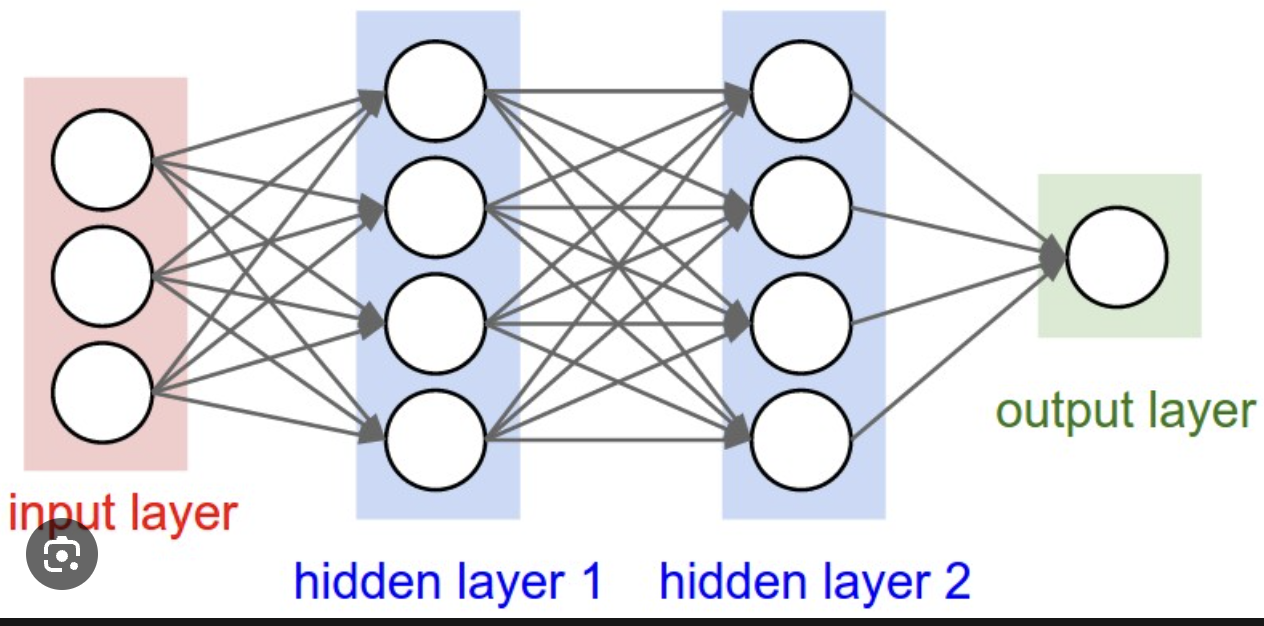

In [263]:
from IPython.display import Image
Image(filename='assets/cnn.png',width=500,height=300) 

In [267]:



class Layer:
    # nin is the number of input for the layer
    # n_neurons is the the number of neuron in the single layer
    def __init__(self,nin,n_neurons) -> None:
        self.neurons = [Neuron(nin) for _ in range(n_neurons)]
    
    def __call__(self, x) :
         outs = [n(x) for n in self.neurons]  
         return outs[0] if len(outs) == 1 else outs 
    
    def parameters(self):
        params=[]
        for neuron in self.neurons:
            params.extend(neuron.parameters())
        return params    



x=[2.0,3.0,1.0]
n=Layer(3,4)


[Value(data=-0.8823198042457437, grad=0.0),
 Value(data=0.8753115572025116, grad=0.0),
 Value(data=-0.9994738013970004, grad=0.0),
 Value(data=-0.6311136761023209, grad=0.0)]

In [ ]:
from typing import Any

# Lets define Multilayer Perceptron  as shown in the picture
class MLP:
    # nin is the number of input to the neural net
    # nouts is the layers which builds the ML
    def __init__(self, nin, nouts) -> None:
        size= [nin]+nouts
        #  there will be 4 layers
        numberOfLayers = len(nouts)
        self.layers = [Layer(size[i],size[i+1]) for i in range(numberOfLayers)]

    def __call__(self, x) -> Any:
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        params=[]
        for layer in self.layers:
            params.extend(layer.parameters())
        return params        


           

In [268]:
inputs=[2.0, 3.0,-1.0]
layers = [4,4,1]
n = MLP(len(inputs),layers)
n(inputs)

Value(data=0.9649507807984025, grad=0.0)

***Goal 7 : model the Loss Function***

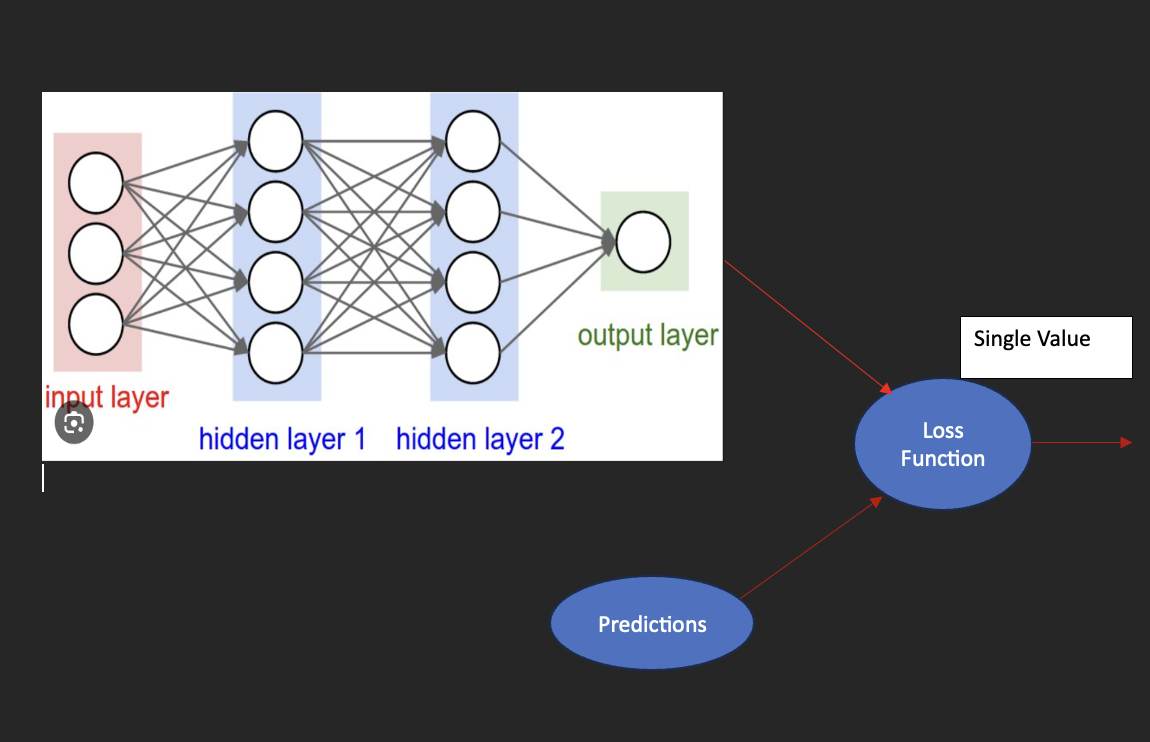

In [269]:
from IPython.display import Image
Image(filename='assets/cnn_with_loss.png',width=500,height=300) 

Model: 
* mathematical function (the above MNN) with value of weight and biases fixed.
* The value of weight and biases are determined through training phase.



<iframe src="https://giphy.com/embed/QFypAZbq5lz3i" width="480" height="199" frameBorder="0" class="giphy-embed" allowFullScreen></iframe>
Reducing Losses

Lets say we are training for archery. aim is to hit bulls eye
* totally dark. aim randomly.
* have ability to calculate loss. (how far we are from bull eye)
* have ability to reduce loss in next iteration. (go towads the bull eye)
* repeat for multiple iteration and go towards bulls eye

Loss Function 
* How far we are from Bulls eye

* This gives you a single scalar value representing how wrong (or right) you are. The goal is to make this value as small as possible. and thats through gradient descent.





Original Training Data

| House # | Size (sq. ft.) | Bedrooms | Distance from City Center (miles) | Price (Output) |
|---------|:--------------:|:--------:|:---------------------------------:|:--------------:|
| 1       | 1500           | 3        | 5                                 | $800,000       |
| 2       | 2500           | 4        | 2                                 | $160,0000       |
| 3       | 1000           | 2        | 10                                | $400,000       |
| 4       | 2800           | 4        | 4                                 | $150,0000       |


After Feature Engineering

| House # | Size (scaled) | Bedrooms (scaled) | Distance (scaled) |
|---------|:-------------:|:-----------------:|:-----------------:|
| 1       | 0.4           | 0.5               | 0.3               |
| 2       | 0.7           | 1.0               | 0.1               |
| 3       | 0.1           | 0.0               | 0.8               |
| 4       | 0.9           | 0.7               | 0.5               |


In [271]:
# Lets define the input data and desired targets (prediction)
#  there are 4 inputs and each input has three data points (size, bedrooms and distance from city centre)
inputs = [
    [0.4, 0.5, 0.3],
    [0.7, 1.0, 0.1],
    [0.1, 0.0, 0.8],
    [0.9, 0.7, 0.5]
]


targets = [-1.0, 1.0, -1.0, 1.0] # desired targets if the price is > 1 million. -1 represent no and 1 represent yes

In [272]:
# Lets see what are the predictions from the neural network in current form 
predictions = [n(x) for x in inputs]
predictions



[Value(data=0.785560320310407, grad=0.0),
 Value(data=0.9696750838553306, grad=0.0),
 Value(data=0.4366721297753725, grad=0.0),
 Value(data=0.8902284311744105, grad=0.0)]

Right now we have aimed randomly

The trick is to convert the lisf of predictions into single number and also the desired target to single number and compare them. 
This single number is called loss. Loss is a single number that tells you how well the neural network is performing.


$$ 
{MSE Loss} = \frac{1}{n} \sum_{i=1}^{n} (target_i - prediction_i)^2
$$


* n is the number of data points or samples.

we do square because it will be always a positive number. The more way off you are the higher loss would be there.




In [273]:
[ (targeti-predictioni)**2 for targeti,predictioni in zip(targets,predictions)]

[Value(data=3.1882256574670027, grad=0.0),
 Value(data=0.0009196005391812289, grad=0.0),
 Value(data=2.0640268084733044, grad=0.0),
 Value(data=0.012049797322431126, grad=0.0)]

In [274]:
loss = (sum([ (targeti-predictioni)**2 for targeti,predictioni in zip(targets,predictions)])) * (1/4)
loss

Value(data=1.3163054659504798, grad=0.0)

In [275]:
def calc_loss():
    predictions = [n(x) for x in inputs]
    return (sum([ (targeti-predictioni)**2 for targeti,predictioni in zip(targets,predictions)])) * (1/4)
    


In [276]:
loss = calc_loss()
loss

Value(data=1.3163054659504798, grad=0.0)

We have acheived following

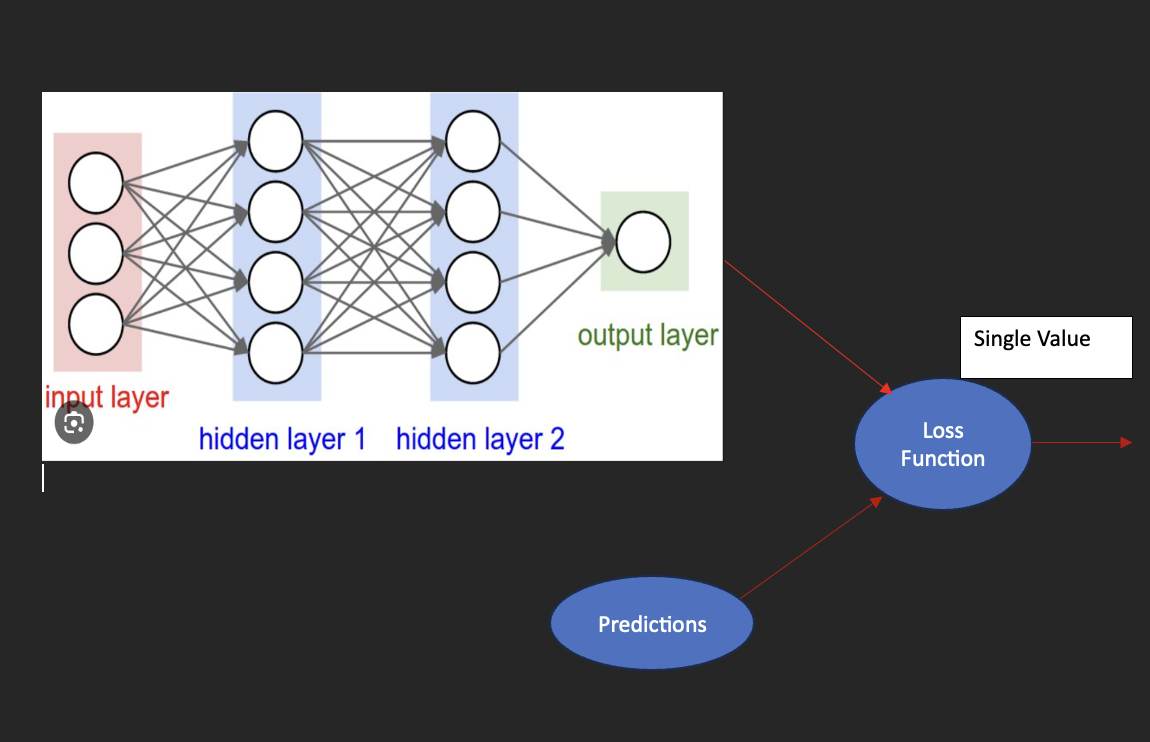

In [277]:
from IPython.display import Image
Image(filename='assets/cnn_with_loss.png',width=500,height=300) 

In [278]:
loss.grad=1.0
loss.backward()

In [281]:
n.parameters()
len(n.parameters())
n.parameters()

[Value(data=-0.8014063520684762, grad=-6.24571561187765),
 Value(data=-0.7797074686180998, grad=-5.051078272926142),
 Value(data=0.9413768568395577, grad=-2.7910250118288684),
 Value(data=0.5485259389673027, grad=-2.034907712985753),
 Value(data=-0.40440994024123733, grad=0.9897949742065761),
 Value(data=0.5521444105432287, grad=0.3615426331034672),
 Value(data=-0.2935466824883666, grad=2.956957228101461),
 Value(data=0.807886126392936, grad=1.7318431482184156),
 Value(data=-0.5677867482216368, grad=-2.875077320239252),
 Value(data=-0.3329877297826711, grad=-2.2923444466509713),
 Value(data=0.8898227807939181, grad=-1.4312737231269967),
 Value(data=0.9074965759280349, grad=-0.9641022227082141),
 Value(data=-0.3215638345484386, grad=1.972125059533398),
 Value(data=-0.6524448411199286, grad=1.8217818432359643),
 Value(data=0.2755111024011856, grad=0.13033786721681534),
 Value(data=-0.6903362489169711, grad=0.5070095526727224),
 Value(data=-0.9808347158233197, grad=0.16251388860238605),
 

Lets adjust all the weights data according to gradient information in order to reduce the loss. Increase the data by tiny amount towards the gradient

In [282]:
lr=0.001
for weight in n.parameters():
    # - is to decrease the loss
    weight.data += lr * (-weight.grad)

lets calculate new loss

In [283]:
print(calc_loss())
print(f"difference in loss : ${loss-calc_loss()}")

Value(data=1.3072942311421447, grad=0.0)
difference in loss : $Value(data=0.0090112348083351, grad=0.0)


Lets do this iteratively


In [284]:
lr=0.1
epoch = 40
for k in range(epoch):
    # forward pass 
    loss = calc_loss()
    
    
    # backward pass

    # zero_grad() in pytorch
    for p in n.parameters():
        p.grad = 0
    loss.grad=1
    loss.backward()

    # update params based on gradient.
    # go in reverse direction of gradient

    for p in n.parameters():
    # - is to decrease the loss
        p.data += lr * (-p.grad)
    print(k, loss.data)    


0 1.3072942311421447
1 0.6137625364300152
2 0.9890591967671947
3 0.8332847685996019
4 0.767459204509719
5 0.7203010020135638
6 0.6845870296831038
7 0.6453966785848049
8 0.7530117038241381
9 0.7385308293584176
10 0.5804222985635897
11 0.5602272917344265
12 0.5514702884373166
13 0.5581299035203843
14 0.5943571947167403
15 0.8113234276378948
16 0.6716081710858831
17 0.5962687833241108
18 0.47733051151966355
19 0.6604523557750313
20 0.765993518109383
21 0.6322283595122005
22 0.37764748085874994
23 0.37472954436739303
24 0.3905164913202479
25 0.6627807711152567
26 0.28636459106010037
27 0.3228021988590469
28 0.661633498358427
29 0.28439765982163207
30 0.2442772060048134
31 0.3636849422679116
32 0.6699878167918375
33 0.8803770224030959
34 0.841270930378808
35 0.7918197129128807
36 0.7304256845729507
37 0.6671122844863283
38 0.6189720202135667
39 0.581019264594634


In [286]:
# Lets define the input data and desired targets (prediction)
#  there are 4 inputs and each input has three data points (size, bedrooms and distance from city centre)
inputs = [
    [0.4, 0.5, 0.3],
    [0.7, 1.0, 0.1],
    [0.1, 0.0, 0.8],
    [0.9, 0.7, 0.5]
]


targets = [-1.0, 1.0, -1.0, 1.0] # desired targets if the price is > 1 million. -1 represent no and 1 represent yes
n(inputs[1])

Value(data=0.34421284450155815, grad=0.0)

Lets Summarize every together
* What are neural net: Neural nets are mathematical expressions. Fairly simple mathematical expression in terms of multi-layer perceptron. that take input as data. it has value for all the parameters like weight and biases fixed.
Training Process
* mathematical expression for forward pass, followed by loss function.
* Loss function tries to predict the accuracy of the predictions. Usually loss would be low when predictions are matching the targets.
* use backpropogation to get the gradient and tune the paremeters to decrease the loss locally.
* Iterate this process many times: this is called gradient descent.
